In [29]:
import pandas as pd

whiskey=pd.read_csv('https://www.mathstat.strath.ac.uk/outreach/nessie/datasets/whiskies.txt')
whiskey['Region']=pd.read_csv('regions.txt')

whiskey=whiskey.drop('RowID',axis=1)
whiskey=whiskey.set_index('Distillery')
whiskey.head(20)


,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
Distillery,,,,,,,,,,,,,,,,
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands
ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,Islands
Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands
Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623,Speyside
Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,Speyside


In [3]:
# Correlation matrix for the different flavors of whiskey.
# Highly correlated flavors appear to be:
# Smoky and Medicinal (a little surprising)
# Smoky and Body
flavors = whiskey.iloc[:, :12]
corr_flavors = pd.DataFrame.corr(flavors)
print(corr_flavors)

               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

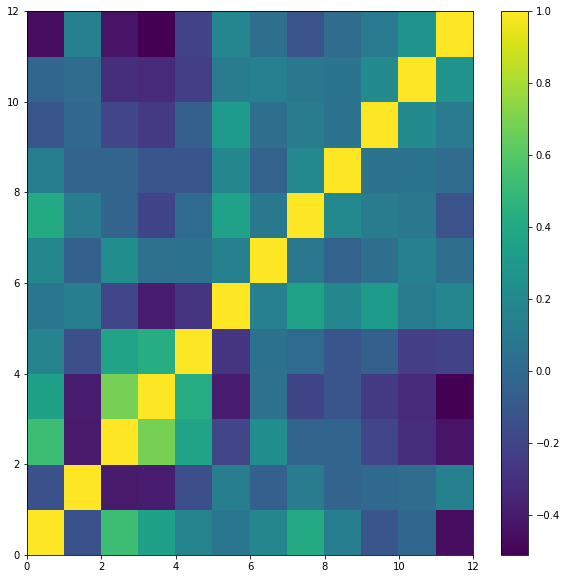

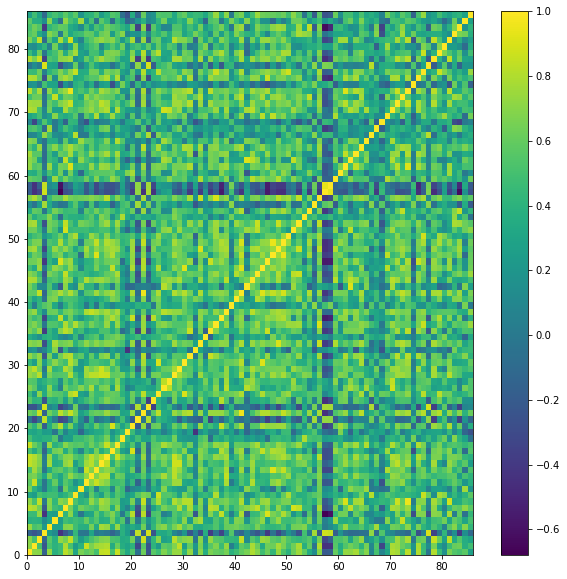

In [4]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10, 10))
plt.pcolor(corr_flavors)
plt.colorbar()
     #>>>plt.savefig("corlate-whisky1.pdf")
 
corr_whiskey = pd.DataFrame.corr(flavors.transpose())
plt.figure(figsize=(10, 10))
plt.pcolor(corr_whiskey)
plt.axis("tight")
plt.colorbar()
     #>>>plt.savefig("corlate-whisky2.pdf")
 
plt.show()


In [30]:
#Comparison of hierarchical clustering measured by the percentage of preserved original distance (via cophenet).
# The methods of average and complete linkage preserve the distance the best.
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

methods=['complete','ward','average','single']

# Calculate the linkage: mergings
preserved_distance={method+'_euclidean':cophenet(linkage(flavors,method=method),pdist(flavors))[0] for method in methods}
print(preserved_distance)


{'single_euclidean': 0.59935000981771358, 'complete_euclidean': 0.61572056022385957, 'ward_euclidean': 0.61127374622785713, 'average_euclidean': 0.7965991217253976}


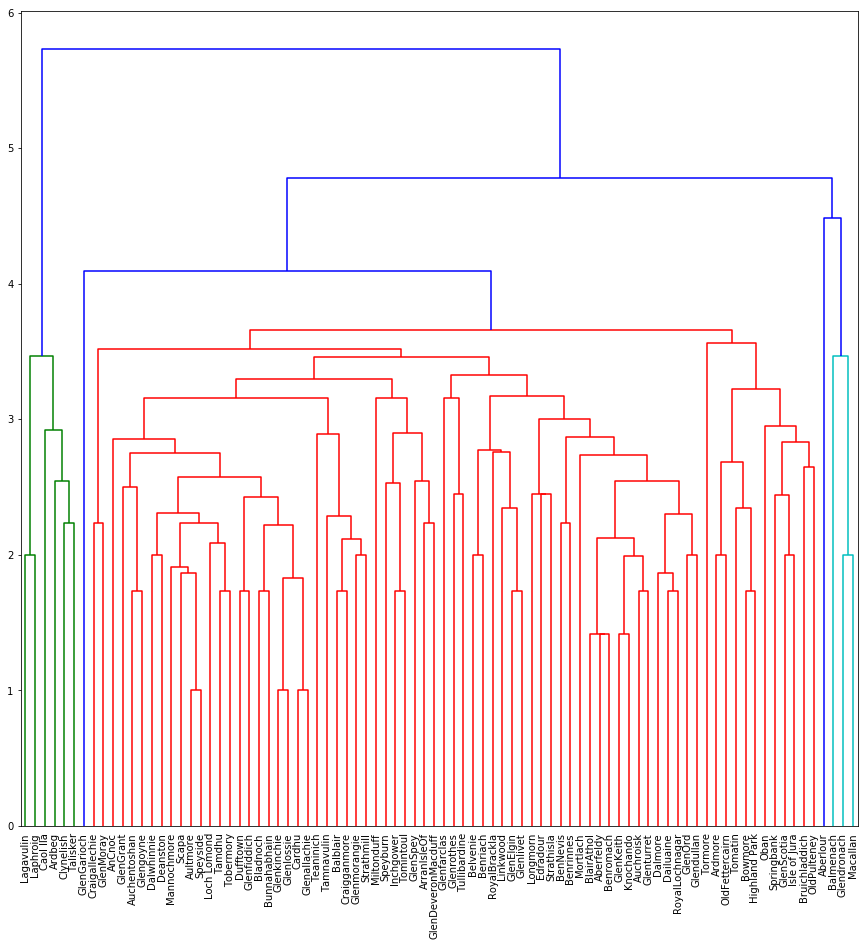

In [31]:
mergings=linkage(flavors,method='average')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(15,15))
dendrogram(mergings,
           labels=whiskey.index,
           leaf_rotation=90,
           leaf_font_size=10,
)
#plt.xticks(rotation=45)
plt.show()

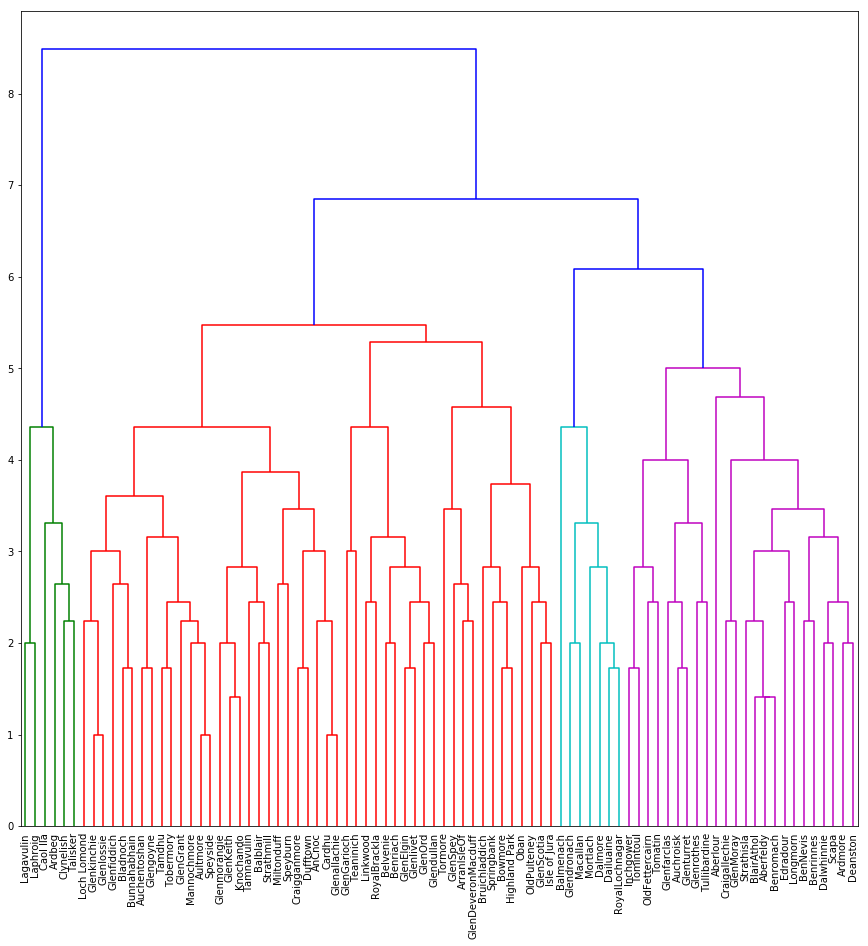

In [32]:
mergings=linkage(flavors,method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(15,15))
dendrogram(mergings,
           labels=whiskey.index,
           leaf_rotation=90,
           leaf_font_size=10,
)
#plt.xticks(rotation=45)
plt.show()

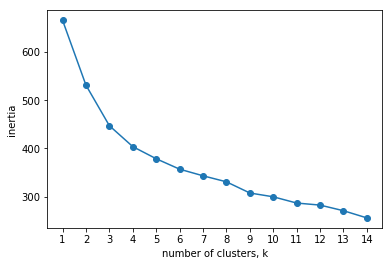

In [8]:
#K-Means has an 'elbow' at around 4 clusters, and this agrees with the number of groups given by complete linkage.
from sklearn.cluster import KMeans

ks = range(1, 15)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(flavors)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [9]:
#Calculate groupings based on hierarchical clustering with complete linkage.

from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings,6,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df1 = pd.DataFrame({'Group': labels, 'Region': whiskey['Region']})

# Create crosstab: ct
ct1 = pd.crosstab(df1['Group'],df1['Region'])

pd.set_option('display.max_rows', len(df1))
#print(df1.sort_values('Group'))


In [33]:
#Comparison of group distributions for hierarchical clustering and K-Means.
#Note that a particular group has persisted through all clustering methods run thus far.
#That group corresponds to the single malts:  Ardbeg, Caol Ila, Clynelish, Lagavulin, Laphroig, and Talisker

#Note also that the regions Lowlands and Campbelltown each end up grouped together.
#However, the number of samples from these regions is small.

model=KMeans(n_clusters=4, random_state=412)
model.fit(flavors)
Whiskey_Clusters=model.predict(flavors)
df2=whiskey[['Region']]
df2['Group']=Whiskey_Clusters

# Create crosstab: ct
ct2 = pd.crosstab(df2['Group'],df2['Region'])

# Display ct
print('Groups from Hierarchical Clustering')
print(ct1)
print('Groups from K-Means')
print(ct2)
print(df1[df1['Group']==1])
print(df2[df2['Group']==2])

Groups from Hierarchical Clustering
Region  Campbelltown  Highlands  Islands  Islay  Lowlands  Speyside
Group                                                              
1                  0          1        1      4         0         0
2                  2         10        4      3         3        27
3                  0          3        0      0         0         4
4                  0         11        1      0         0        12
Groups from K-Means
Region  Campbelltown  Highlands  Islands  Islay  Lowlands  Speyside
Group                                                              
0                  0          6        2      1         3        23
1                  2          8        2      2         0         2
2                  0          1        1      4         0         0
3                  0         10        1      0         0        18
                Group     Region
Distillery                      
Balmenach           1   Speyside
Dailuaine           1   Speys

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [11]:
#Matching the groups from Hierarchical clustering with the groups from K-Means clustering via the relationship,
# 1-->2, 2-->0, 3-->1, 4-->3, results in 52 of the 86 whiskies being similarly grouped. 
df1['Group']=df1['Group'].replace([1,2,3,4],[2,0,1,3])
common_groups=df1.loc[df1['Group']==df2['Group'],:]
print(len(common_groups))

52


In [34]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors',
                           assign_labels='kmeans',random_state=42)
labels = model.fit_predict(flavors)

df3=whiskey[['Region']]
df3['Group']=labels

# Create crosstab: ct
ct3 = pd.crosstab(df3['Group'],df3['Region'])

# Display ct
print('Groups from Hierarchical Clustering')
print(ct1)
print('Groups from K-Means')
print(ct2)
print('Groups from Spectral Clustering')
print(ct3)

Groups from Hierarchical Clustering
Region  Campbelltown  Highlands  Islands  Islay  Lowlands  Speyside
Group                                                              
1                  0          1        1      4         0         0
2                  2         10        4      3         3        27
3                  0          3        0      0         0         4
4                  0         11        1      0         0        12
Groups from K-Means
Region  Campbelltown  Highlands  Islands  Islay  Lowlands  Speyside
Group                                                              
0                  0          6        2      1         3        23
1                  2          8        2      2         0         2
2                  0          1        1      4         0         0
3                  0         10        1      0         0        18
Groups from Spectral Clustering
Region  Campbelltown  Highlands  Islands  Islay  Lowlands  Speyside
Group                       

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [13]:
# Groups of df3 are related to df2 (and the transformed df1) via the mapping,
# 1-->3, 3-->2, 0-->0, 2-->1, which has 46 out of 86 commonly grouped items.
# Given the persistence of these groupings using three distinct clustering algorithms,
# we will give extra weight to items in these groups.
df3['Group']=df3['Group'].replace([0,1,2,3],[0,3,1,2])
index_cg=common_groups.index
df3a=df3.loc[index_cg]
common_groups=common_groups.loc[common_groups['Group']==df3a['Group'],:]
print(len(common_groups))

46


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


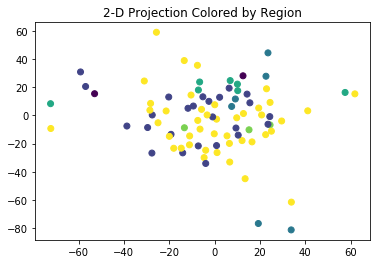

In [35]:
# t-SNE is a dimension reduction technique that aims to preserve the neighbor relations of 
# high-dimensional data by using a t-distribution around each point,
# and allow for the data groupings to be visualized in lower dimensions.
# However, given the points are colored by region, it is clear that the region 
# does not give well-defined groupings.

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
          ('tsne', TSNE(learning_rate=200))]

pipeline = Pipeline(steps)

tsne_features = pipeline.fit_transform(flavors)

xs = tsne_features[:,0]
ys = tsne_features[:,1]
regions=list(whiskey.Region)
region_colors=whiskey.Region.replace(['Campbelltown','Highlands','Islands','Islay','Lowlands','Speyside'],[1,2,3,4,5,6])

plt.scatter(xs,ys,c=region_colors)
plt.title('2-D Projection Colored by Region')
plt.show()


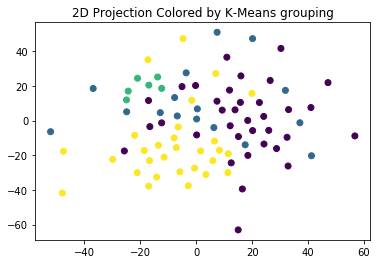

In [15]:
#A similar plot, but now colored according to
#the K-Means grouping.
#In this case, there appears to be a better sense of groups.

plt.scatter(xs,ys,c=list(df2['Group']))
plt.title('2D Projection Colored by K-Means grouping')
plt.show()

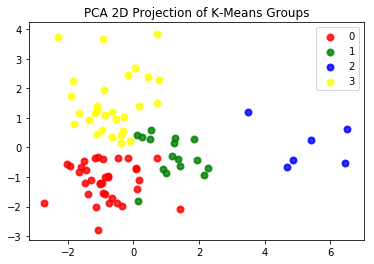

In [36]:
# A 2D projection generated by PCA.
# The K-Means groups are well distinuished in this case.
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler=StandardScaler()
pca=PCA(n_components=2)

pipeline = make_pipeline(scaler,pca)

X_r=pipeline.fit(flavors).transform(flavors)

colors=['red','green','blue','yellow']

for color, i in zip(colors, [0, 1, 2, 3]):
    plt.scatter(X_r[df2.Group == i, 0], X_r[df2.Group == i, 1], color=color, alpha=.8, lw=2,
                label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA 2D Projection of K-Means Groups')
plt.show()

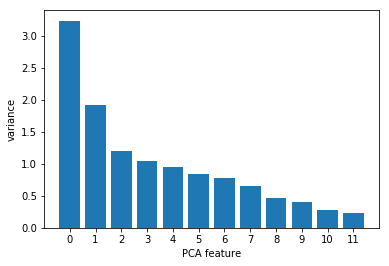

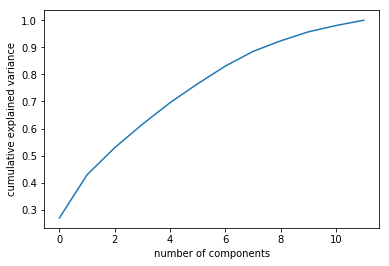

In [37]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler=StandardScaler()
pca=PCA()

pipeline = make_pipeline(scaler,pca)

pipeline.fit(flavors)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

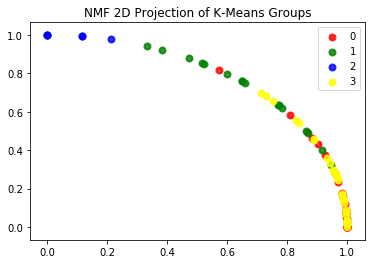

In [38]:
# A 2D projection given by the Non-negative Matrix Factorization (NMF). This is
# not a very helpful plot, given that any values are mapped to the same point.
# The resulting points lie on a curve, which comes from both the fact that the
# categories take a finite discrete set of values, and NMF identifies "parts".

from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize

nmf = NMF(n_components=2)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(flavors)

df = pd.DataFrame(norm_features,index=whiskey.index)

colors=['red','green','blue','yellow']

for color, i in zip(colors, [0, 1, 2, 3]):
    plt.scatter(norm_features[df2.Group == i, 0], norm_features[df2.Group == i, 1], color=color, alpha=.8, lw=2,
                label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('NMF 2D Projection of K-Means Groups')
plt.show()

In [39]:
# Evaluating the number of NMF components by checking how it matches up with the common_groups 
# of the previous clustering methods. 6 and 8 appear to have the best correspondence,
# and we will go with 6.
comp_range=range(1,13)
scores=[]
for n_components in comp_range:
    number_grouped=0
    for scotch in common_groups.index:
        nmf = NMF(n_components=n_components, random_state=30)
        normalizer = Normalizer()
        pipeline = make_pipeline(nmf,normalizer)
        norm_features = pipeline.fit_transform(flavors)
        df_nmf = pd.DataFrame(norm_features,index=whiskey.index)
        distillery = df_nmf.loc[scotch]
        similarities = df_nmf.dot(distillery)
        top_sim=similarities.nlargest()
        top_5=top_sim.index
        top_4=top_5[1:]
        group_id=common_groups.loc[scotch,'Group']
        for scotch1 in top_4:
            if scotch1 in common_groups.loc[common_groups.Group==group_id].index:
                number_grouped+=1
    scores.append(number_grouped)
print(scores)

[46, 101, 121, 120, 126, 131, 129, 135, 122, 125, 122, 85]


In [20]:

nmf = NMF(n_components=6)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(flavors)

df = pd.DataFrame(norm_features,index=whiskey.index)

scotch='Oban'
# Select row of scotch
distillery = df.loc[scotch]

# Compute cosine similarities: similarities
similarities = df.dot(distillery)

# Display those with highest cosine similarity
print(similarities.nlargest())

Distillery
Oban           1.000000
OldPulteney    0.961760
Clynelish      0.946897
Talisker       0.915812
Balblair       0.909778
dtype: float64


In [41]:
# Converting coordinates from British National Grid (BNG) to Latitude, Longitude.
from convertbng.util import convert_lonlat

lat=list(whiskey.iloc[:,-3])
lon=list(whiskey.iloc[:,-2])

coordinates=convert_lonlat(lat,lon)

df2['longitude']=coordinates[0]
df2['latitude']=coordinates[1]

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-9.0,54.0,2.5,59.5&bboxSR=4326&imageSR=4326&size=1500,717&dpi=96&format=png32&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-9.0,54.0,2.5,59.5&bboxSR=4326&imageSR=4326&size=1500,717&dpi=96&format=png32&f=image


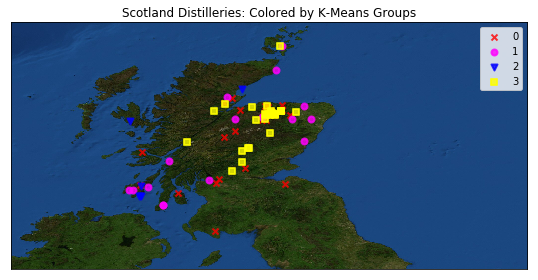

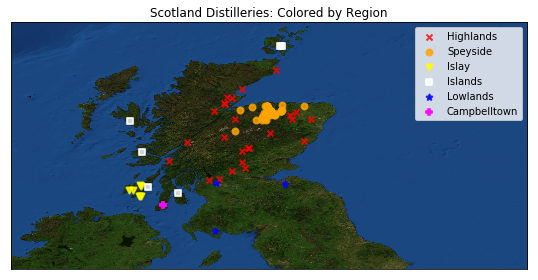

In [43]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
m1 = Basemap(llcrnrlon=-9.,llcrnrlat=54,urcrnrlon=2.5,urcrnrlat=59.5,
            resolution='h')

m1.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
colors1=['red','magenta','blue','yellow']
markers1=['x','o','v','s']
for color, marker, i in zip(colors1, markers1, [0, 1, 2, 3]):
    m1.scatter(df2.loc[df2.Group==i,'longitude'], df2.loc[df2.Group==i,'latitude'], marker=marker, color=color, alpha=.8, lw=2, label=i)

plt.title("Scotland Distilleries: Colored by K-Means Groups")
plt.legend()

regions=df2.Region.unique()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
m2 = Basemap(llcrnrlon=-9.,llcrnrlat=54,urcrnrlon=2.5,urcrnrlat=59.5,
            resolution='h')

m2.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
colors2=['red','orange','yellow','white','blue','magenta']
markers2=['x','o','v','s','*','P']
for region, i, color, marker in zip(regions,[0,1,2,3,4,5],colors2, markers2):
    m2.scatter(df2.loc[df2.Region==region,'longitude'], df2.loc[df2.Region==region,'latitude'], marker=marker, color=color, alpha=.8, lw=2, label=region)

plt.title("Scotland Distilleries: Colored by Region")
plt.legend()
plt.show()
